In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import label_binarize

In [2]:
df = pd.read_csv('combined_data_with_extra_data2.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,Run ID,Sex,Age,Country,BMI,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,ERR1075960,Male,0.0,United States of America,21.22,Health,0.034320,0.320964,0.005633,0.013763,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ERR1854747,Male,62.0,United Kingdom,28.70,Health,0.038577,0.204173,0.014874,0.008240,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ERR688529,Male,63.0,Austria,30.90,Health,0.086423,0.066411,0.026879,0.069596,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ERR1316059,Male,67.0,United States of America,22.15,Health,0.096800,0.233068,0.009989,0.015105,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR5649200,Male,27.0,United States of America,20.80,Health,0.083754,0.196804,0.058733,0.039295,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,SRR7690181,male,68.0,USA,28.75,Health,0.000000,0.021739,0.000000,0.000000,...,0.0,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1641,SRR7690182,female,69.0,USA,29.05,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,SRR7690183,female,59.0,USA,23.66,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,SRR7690184,female,56.0,USA,43.85,Bipolar Disorder,0.000000,0.020000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.columns

Index(['Run ID', 'Sex', 'Age', 'Country', 'BMI', 'Condition', 'Alistipes',
       'Bacteroides', 'Bifidobacterium', 'Blautia', 'Clostridium', 'Dorea',
       'Eubacterium', 'Faecalibacterium', 'Oscillibacter', 'Parabacteroides',
       'Roseburia', 'Ruminococcus', 'Unknown', 'Coprococcus', 'Lachnospira',
       'Oscillospira', 'Subdoligranulum', 'Sutterella', 'Anaerostipes',
       'Streptococcus', 'Akkermansia', 'Anaerofilum', 'Anaerotruncus',
       'Bacillus', 'Barnesiella', 'Desulfovibrio', 'Dialister',
       'Erysipelatoclostridium', 'Holdemania', 'Intestinibacter',
       'Lachnoclostridium', 'Lactobacillus', 'Odoribacter', 'Prevotella',
       'Pseudomonas', 'Sporobacter', 'Ruminiclostridium', 'Corynebacterium',
       'Eggerthella', 'Acinetobacter', 'Parasutterella', 'Veillonella',
       'Uncultured Organism', 'Ruminococcaceae', 'Phocaeicola',
       'Paraprevotella', 'Tidjanibacter', 'Flavonifractor',
       'Mediterraneibacter', 'Agathobacter', 'Ligilactobacillus',
       '

In [4]:
df['Ruminococcus'] += df[['Ruminococcaceae']].sum(axis=1)

In [5]:
df = df.drop(['Ruminococcaceae', 'Unknown', 'Uncultured Organism', 'Sex', 'Age', 'Country', 'BMI', 
             'Run ID'], axis=1)

In [6]:
numeric_cols = df.select_dtypes(include=['number'])
# df[df.sum(axis=1) == 0]
zero_rows = numeric_cols.sum(axis=1) == 0
#df = df.drop(zero_rows, axis=0)
df = df[~zero_rows]

In [7]:
df[numeric_cols.columns] = numeric_cols.div(numeric_cols.sum(axis=1), axis=0)

In [8]:
df.reset_index(drop=True)

,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,Health,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,0.209882,0.025343,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Health,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,0.162969,0.097854,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Health,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,0.176429,0.003115,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Health,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,0.326507,0.083430,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Health,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,0.035214,0.012203,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,0.285714,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,Health,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1605,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1606,Bipolar Disorder,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df['Condition'].unique()

array(['Health', 'Parkinsons', 'Alzheimers',
       'Bipolar Disorder, Depression, Schizophrenia',
       'Bipolar Disorder, Depression, Epilepsy, Schizophrenia',
       'Bipolar Disorder', 'Epilepsy', 'Depression', 'Schizophrenia'],
      dtype=object)

In [10]:
df = df[(df['Condition'] != 'Alzheimers') & 
        (df['Condition'] != 'Parkinsons')]

In [11]:
df['Condition'].unique()

array(['Health', 'Bipolar Disorder, Depression, Schizophrenia',
       'Bipolar Disorder, Depression, Epilepsy, Schizophrenia',
       'Bipolar Disorder', 'Epilepsy', 'Depression', 'Schizophrenia'],
      dtype=object)

In [12]:
df.reset_index(drop=True)

,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,Health,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,0.209882,0.025343,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Health,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,0.162969,0.097854,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Health,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,0.176429,0.003115,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Health,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,0.326507,0.083430,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Health,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,0.035214,0.012203,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,0.285714,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1481,Health,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1482,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1483,Bipolar Disorder,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_label = df['Condition']
df_label_string = df_label

In [14]:
dictionary = {'Health':0,
              'Bipolar Disorder, Depression, Schizophrenia':1,
              'Bipolar Disorder, Depression, Epilepsy, Schizophrenia':2,
              'Bipolar Disorder':3,
              'Epilepsy':4,
              'Depression':5, 
              'Schizophrenia':6
}

In [15]:
y = df_label.map(dictionary)

In [16]:
y.reset_index(drop=True)

0       0
1       0
2       0
3       0
4       0
       ..
1480    3
1481    0
1482    3
1483    3
1484    3
Name: Condition, Length: 1485, dtype: int64

In [17]:
df = df.drop(['Condition'], axis=1)

In [18]:
df.reset_index(drop=True)

,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,0.209882,0.025343,0.031733,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,0.162969,0.097854,0.022425,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,0.176429,0.003115,0.003892,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,0.326507,0.083430,0.060624,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,0.035214,0.012203,0.044716,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,0.285714,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1481,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1482,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1483,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
bins = [0, 0.33, 0.67, 1]
labels = ['low', 'medium', 'high']

numeric_cols = df.select_dtypes(include='number').columns 

for col in numeric_cols:
    #df[col] = df[col].astype('object')
    
    df.loc[:, col] = np.where(df[col] == 0, 0, 
                              pd.cut(df[col], bins=bins, labels=[f'{label}{col}' for label in labels], 
                                     include_lowest=True))
df.reset_index(drop=True)

,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
1,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
2,lowAlistipes,lowBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
3,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
4,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,0,0,0,0,0,highEubacterium,0,lowOscillibacter,0,...,0,0,0,0,0,0,0,0,0,0
1481,0,lowBacteroides,0,0,0,0,0,0,0,0,...,0,highParaprevotella,0,0,0,0,0,0,0,0
1482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1483,0,lowBacteroides,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.columns = range(1, len(df.columns) + 1)

In [22]:
df.reset_index(drop=True)

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
0,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
1,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
2,lowAlistipes,lowBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
3,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
4,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,0,0,0,0,0,highEubacterium,0,lowOscillibacter,0,...,0,0,0,0,0,0,0,0,0,0
1481,0,lowBacteroides,0,0,0,0,0,0,0,0,...,0,highParaprevotella,0,0,0,0,0,0,0,0
1482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1483,0,lowBacteroides,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df.loc[1]

1            lowAlistipes
2       mediumBacteroides
3      lowBifidobacterium
4              lowBlautia
5          lowClostridium
6                lowDorea
7          lowEubacterium
8     lowFaecalibacterium
9        lowOscillibacter
10     lowParabacteroides
11           lowRoseburia
12        lowRuminococcus
13                      0
14                      0
15                      0
16                      0
17                      0
18                      0
19                      0
20                      0
21                      0
22                      0
23                      0
24                      0
25                      0
26                      0
27                      0
28                      0
29                      0
30                      0
31                      0
32                      0
33                      0
34                      0
35                      0
36                      0
37                      0
38                      0
39          

In [24]:
df.replace("0", pd.NA, inplace=True)
df = df.apply(lambda x: x.dropna().tolist(), axis=1).tolist()

In [25]:
df = pd.DataFrame(df)
df.fillna('').replace('None', '', inplace=True)

In [26]:
df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
1,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
2,lowAlistipes,lowBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
3,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
4,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,0,0,0,0,0,highEubacterium,0,lowOscillibacter,0,...,0,0,0,0,0,0,0,0,0,0
1481,0,lowBacteroides,0,0,0,0,0,0,0,0,...,0,highParaprevotella,0,0,0,0,0,0,0,0
1482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1483,0,lowBacteroides,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df.fillna(0, inplace=True)

In [28]:
df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
1,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
2,lowAlistipes,lowBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
3,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
4,lowAlistipes,mediumBacteroides,lowBifidobacterium,lowBlautia,lowClostridium,lowDorea,lowEubacterium,lowFaecalibacterium,lowOscillibacter,lowParabacteroides,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,0,0,0,0,0,highEubacterium,0,lowOscillibacter,0,...,0,0,0,0,0,0,0,0,0,0
1481,0,lowBacteroides,0,0,0,0,0,0,0,0,...,0,highParaprevotella,0,0,0,0,0,0,0,0
1482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1483,0,lowBacteroides,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df.loc[1]

0            lowAlistipes
1       mediumBacteroides
2      lowBifidobacterium
3              lowBlautia
4          lowClostridium
5                lowDorea
6          lowEubacterium
7     lowFaecalibacterium
8        lowOscillibacter
9      lowParabacteroides
10           lowRoseburia
11        lowRuminococcus
12                      0
13                      0
14                      0
15                      0
16                      0
17                      0
18                      0
19                      0
20                      0
21                      0
22                      0
23                      0
24                      0
25                      0
26                      0
27                      0
28                      0
29                      0
30                      0
31                      0
32                      0
33                      0
34                      0
35                      0
36                      0
37                      0
38          

In [30]:
items = set()
for col in df:
    items.update(df[col].unique())
print(items)

{0, 'highBifidobacterium', 'highOscillibacter', 'lowSporobacter', 'mediumAlistipes', 'lowFaecalibacterium', 'lowAnaerofilum', 'highClostridium', 'highPrevotella', 'highEscherichia', 'mediumParaprevotella', 'highParabacteroides', 'lowMediterraneibacter', 'lowRoseburia', 'lowDesulfovibrio', 'mediumRoseburia', 'mediumRuminococcus', 'lowOscillibacter', 'highEubacterium', 'highBacillus', 'lowOdoribacter', 'lowEubacterium', 'highStreptococcus', 'highIntestinibacter', 'lowTidjanibacter', 'lowDialister', 'lowAnaerotruncus', 'mediumTidjanibacter', 'mediumMediterraneibacter', 'highAnaerobutyricum', 'highAnaerostipes', 'lowStreptococcus', 'lowVeillonella', 'lowRuminococcus', 'lowPhocaeicola', 'mediumLachnoclostridium', 'mediumFlavonifractor', 'lowCollinsella', 'lowBlautia', 'lowAkkermansia', 'lowParasutterella', 'lowParabacteroides', 'highPhocaeicola', 'mediumClostridium', 'lowErysipelatoclostridium', 'mediumBlautia', 'mediumFaecalibacterium', 'lowClostridium', 'mediumEubacterium', 'lowBacteroide

In [31]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row)
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

# ohe -> One-Hot-Encoded
ohe_df = pd.DataFrame(encoded_vals).drop(columns=0)
ohe_df


,highBifidobacterium,highPhocaeicola,highOscillibacter,lowSporobacter,mediumClostridium,lowErysipelatoclostridium,mediumAlistipes,mediumBlautia,mediumFaecalibacterium,mediumEubacterium,...,lowAlistipes,mediumBacteroides,lowBlautia,lowRoseburia,lowFaecalibacterium,lowRuminococcus,lowEubacterium,lowBifidobacterium,lowParabacteroides,lowClostridium
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X = ohe_df

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [34]:
model = MultinomialNB()

In [35]:
model.fit(X_train, y_train)

MultinomialNB()

In [36]:
y_pred = model.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
np.round(accuracy, decimals=4)

0.8889

In [38]:
y_prob = model.predict_proba(X_test)
# rows are samples and the columns are the probabilities of that sample belonging to the corresponding class 
y_prob[1]

array([3.61866457e-18, 8.25999718e-01, 3.07883114e-04, 1.73528292e-01,
       1.64106496e-04, 2.87415239e-14, 6.51200995e-17])

In [39]:
y_test_array = np.array(y_test)
y_test_bin = label_binarize(y_test_array, classes=np.arange(7))  # Shape: (num_samples, 8)
y_test_bin[1]

array([0, 1, 0, 0, 0, 0, 0])

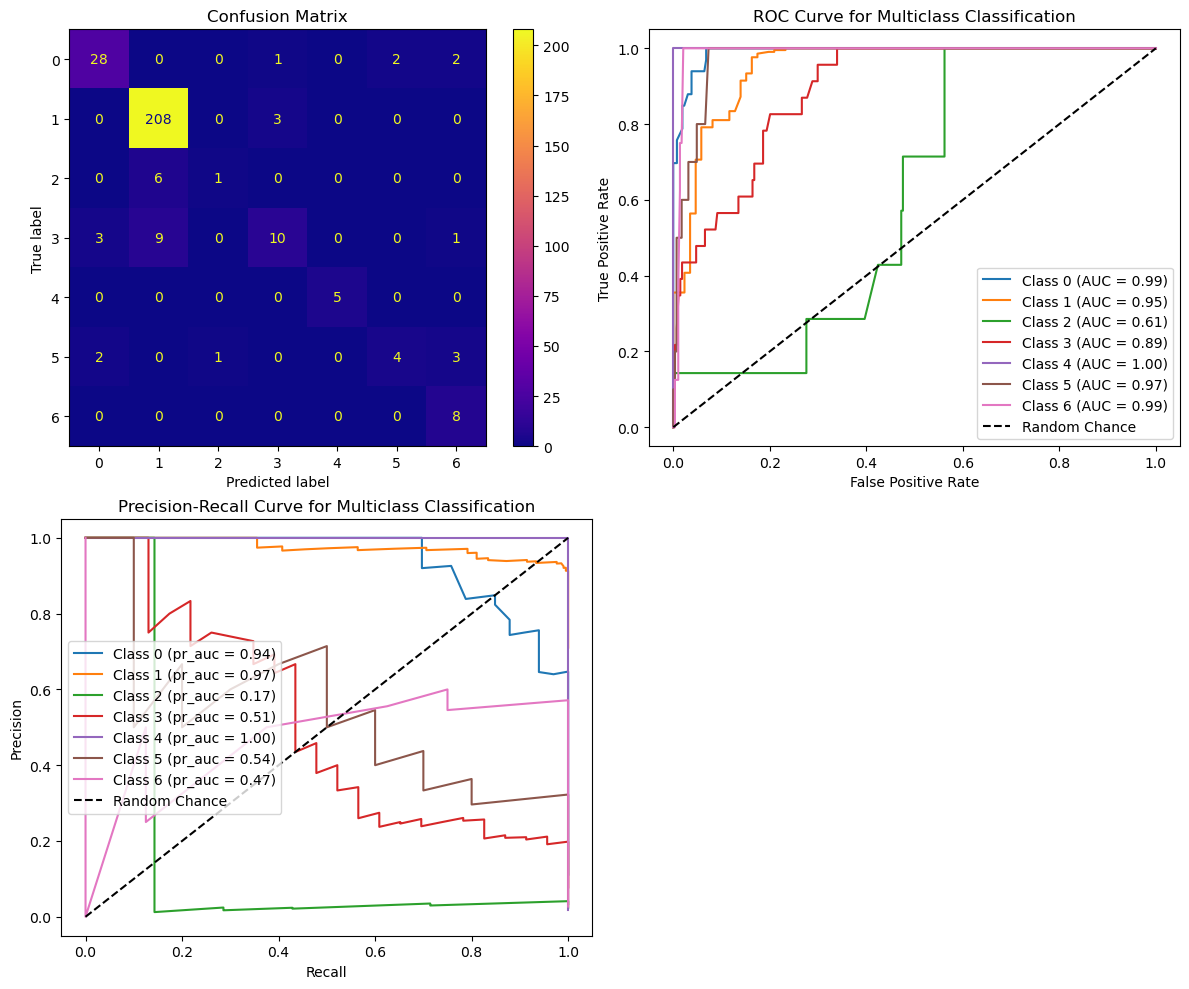

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='plasma', ax=axs[0, 0])  # Top-left subplot
axs[0, 0].set_title('Confusion Matrix')

# roc curve
for i in range(7): 
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    axs[0, 1].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

axs[0, 1].plot([0, 1], [0, 1], 'k--', label='Random Chance')
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve for Multiclass Classification')
axs[0, 1].legend()

# precision-recall curve
for i in range(7): 
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    pr_auc = auc(recall, precision)
    axs[1, 0].plot(recall, precision, label=f'Class {i} (pr_auc = {pr_auc:.2f})')

axs[1, 0].plot([0, 1], [0, 1], 'k--', label='Random Chance')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].set_title('Precision-Recall Curve for Multiclass Classification')
axs[1, 0].legend()

axs[1, 1].axis('off')

plt.tight_layout()
#plt.savefig('categorical_nb_psych.jpg')
plt.show()
